In [ ]:
!python --version

In [2]:
import torch
torch.__version__

C:\Users\navee\anaconda3\envs\DL_projects\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'1.12.1'

In [3]:
import matplotlib.pyplot as plt
import torch
import torchvision

from torch import nn
from torchvision import transforms

In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [5]:
# Setup directory paths to train and test images
# train_dir = 'E:/Deep learning/Project/OTHER_DATA/2/archive/food-101/food-101/train/'
# test_dir = 'E:/Deep learning/Project/OTHER_DATA/2/archive/food-101/food-101/test/'


# train_dir = 'E:/Deep learning/Project/OTHER_DATA/2/archive/food-101/food-101/subset_train/'
# test_dir = 'E:/Deep learning/Project/OTHER_DATA/2/archive/food-101/food-101/subset_test/'

# train_dir='E:/Deep learning/Project/OTHER_DATA/2/archive/food-101/food-101/subset_train_v2/'
# test_dir = 'E:/Deep learning/Project/OTHER_DATA/2/archive/food-101/food-101/subset_test_v2/'

train_dir = 'E:/Deep learning/Project/OTHER_DATA/2/archive/food-101/food-101/sub_v2/subset_train_v2/'
test_dir = 'E:/Deep learning/Project/OTHER_DATA/2/archive/food-101/food-101/sub_v2/subset_test_v2/'

# Create Datasets and DataLoaders

In [6]:
from torch.utils.data import DataLoader, Sampler

class RepetitionSampler(Sampler):
    def __init__(self, data_source, repetitions):
        self.data_source = data_source
        self.repetitions = repetitions

    def __iter__(self):
        indices = list(range(len(self.data_source)))
        repeated_indices = [item for item in indices for _ in range(self.repetitions)]
        return iter(repeated_indices)

    def __len__(self):
        return len(self.data_source) * self.repetitions

In [7]:
import os

from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# NUM_WORKERS = os.cpu_count()
NUM_WORKERS = 0

def create_dataloaders(
    train_dir: str, 
    test_dir: str, 
    transform: transforms.Compose, 
    batch_size: int, 
    num_workers: int=NUM_WORKERS
):


  train_data = datasets.ImageFolder(train_dir, transform=transform)
  test_data = datasets.ImageFolder(test_dir, transform=transform)


  class_names = train_data.classes
  repetitions = 3

  train_dataloader = DataLoader(
      train_data,
      batch_size=batch_size,
      shuffle=True,
      num_workers=num_workers,
      pin_memory=True,
#       sampler=RepetitionSampler(train_data, repetitions)
  )
  test_dataloader = DataLoader(
      test_data,
      batch_size=batch_size,
      shuffle=False,
      num_workers=num_workers,
      pin_memory=True,
  )

  return train_dataloader, test_dataloader, class_names

In [8]:

IMG_SIZE = 224


manual_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
])           
print(f"Manually created transforms: {manual_transforms}")

Manually created transforms: Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=None)
    ToTensor()
)


In [9]:

BATCH_SIZE = 12 #8 



import torchvision.transforms as transforms

def add_gaussian_noise(image, mean=0, std=0.1):
    image = transforms.ToTensor()(image)  
    noise = torch.randn_like(image) * std + mean
    noisy_image = image + noise
    noisy_image = torch.clamp(noisy_image, 0, 1)  
    return transforms.ToPILImage()(noisy_image)  


add_gaussian_noise_transform = transforms.Lambda(lambda x: add_gaussian_noise(x, mean=0, std=0.1))

# # Define data augmentation transforms
# data_augmentation_transforms = transforms.Compose([
#     transforms.Resize((224, 224)),
#     transforms.RandomHorizontalFlip(),  # Randomly flip the image horizontally
#     transforms.RandomApply([transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1)], p=0.5),
#     transforms.RandomRotation(25),  # Randomly rotate the image up to 20 degrees
#     transforms.RandomVerticalFlip(),
#     transforms.RandomApply([transforms.RandomAffine(degrees=0, translate=(0.1, 0.1), scale=(0.8, 1.2))], p=0.5),  # Apply random affine transformations
#     transforms.RandomApply([transforms.RandomPerspective(distortion_scale=0.2, p=0.5)], p=0.5),  # Apply random perspective transformation
#     transforms.RandomApply([transforms.GaussianBlur(kernel_size=5)], p=0.5),
#     transforms.RandomApply([add_gaussian_noise_transform],p=0.5),
#     transforms.ToTensor(),  # Convert the image to a PyTorch tensor
# #     transforms.Normalize(mean=[0.556, 0.447, 0.335], std=[0.231, 0.242, 0.238])  # Normalize the image

# ])

# data_augmentation_transforms = transforms.Compose([
#     transforms.Resize((224, 224)),
#     transforms.ToTensor()  # Convert the image to a PyTorch tensor

# ])


data_augmentation_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),  # Convert the image to a PyTorch tensor
    transforms.Normalize(mean=[0.556, 0.447, 0.335], std=[0.231, 0.242, 0.238])

])


manual_transforms = transforms.Compose([
    # Your manual transforms (resize, center-crop, etc.) here
    data_augmentation_transforms
])



train_dataloader, test_dataloader, class_names = create_dataloaders(
    train_dir=train_dir,
    test_dir=test_dir,
    transform=manual_transforms, 
    batch_size=BATCH_SIZE,
    
)

train_dataloader, test_dataloader, class_names

(<torch.utils.data.dataloader.DataLoader at 0x29eb9d34e80>,
 ['garlic_bread', 'hot_dog', 'ice_cream', 'omelette', 'pizza'])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 224, 224]) tensor(0)


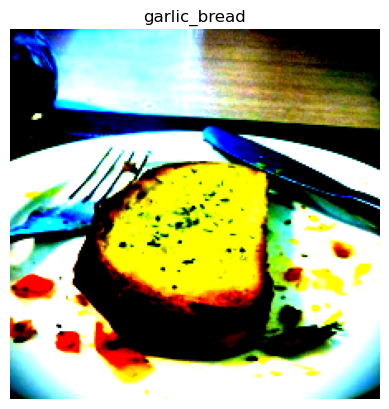

In [10]:



image_batch, label_batch = next(iter(train_dataloader))


image, label = image_batch[0], label_batch[0]


print(image.shape, label)


plt.imshow(image.permute(1, 2, 0)) # rearrange image dimensions to [color_channels, height, width] -> [height, width, color_channels]
plt.title(class_names[label])
plt.axis(False);

# Step 1 

#### Tasks:

1- turn an image into patches

2- flatten the patch feature maps into a single dimension

3- Convert the output into Desried output (flattened 2D patches): (196, 768) -> N×(P2⋅C)       #Current shape: (1, 768, 196)

In [11]:

class PatchEmbedding(nn.Module):

    
    def __init__(self, 
                 in_channels:int=3,
                 patch_size:int=16,
                 embedding_dim:int=768):
        super().__init__()
        
    
        self.patcher = nn.Conv2d(in_channels=in_channels,
                                 out_channels=embedding_dim,
                                 kernel_size=patch_size,
                                 stride=patch_size,
                                 padding=0)

    
        self.flatten = nn.Flatten(start_dim=2, 
                                  end_dim=3)


    def forward(self, x):
     
        image_resolution = x.shape[-1]
        assert image_resolution % patch_size == 0, f"Input image size must be divisble by patch size, image shape: {image_resolution}, patch size: {patch_size}"
        
        
        x_patched = self.patcher(x)
        x_flattened = self.flatten(x_patched) 
        
  
        return x_flattened.permute(0, 2, 1) 

# PatchEmbedding layer ready

In [12]:

patch_size =16


def set_seeds(seed: int=42):

    torch.manual_seed(seed)

    torch.cuda.manual_seed(seed)
    
    
    
set_seeds()


patchify = PatchEmbedding(in_channels=3,
                          patch_size=16,
                          embedding_dim=768)


print(f"Input image shape: {image.unsqueeze(0).shape}")
patch_embedded_image = patchify(image.unsqueeze(0)) 
print(f"Output patch embedding shape: {patch_embedded_image.shape}")

Input image shape: torch.Size([1, 3, 224, 224])
Output patch embedding shape: torch.Size([1, 196, 768])


In [13]:



print(patch_embedded_image) 
print(f"Patch embedding shape: {patch_embedded_image.shape} -> [batch_size, number_of_patches, embedding_dimension]")

tensor([[[-0.5580,  0.2558, -0.0960,  ..., -0.5132,  0.9958, -0.6295],
         [-0.4501,  0.2066, -0.2188,  ...,  0.3132,  0.3205, -0.3174],
         [-1.1220,  0.9130, -0.7095,  ...,  1.0886, -0.0717,  0.1343],
         ...,
         [-1.3053,  0.3918, -0.3312,  ...,  1.0289, -0.5905,  0.3115],
         [-0.7415,  0.2950, -0.2418,  ...,  0.8449, -0.5203,  0.3655],
         [ 0.3911, -0.2640,  0.4571,  ..., -0.2901, -0.1407,  0.0854]]],
       grad_fn=<PermuteBackward0>)
Patch embedding shape: torch.Size([1, 196, 768]) -> [batch_size, number_of_patches, embedding_dimension]


In [14]:


set_seeds()


patch_size = 16


print(f"Image tensor shape: {image.shape}")
height, width = image.shape[1], image.shape[2]


x = image.unsqueeze(0)
print(f"Input image with batch dimension shape: {x.shape}")


patch_embedding_layer = PatchEmbedding(in_channels=3,
                                       patch_size=patch_size,
                                       embedding_dim=768)


patch_embedding = patch_embedding_layer(x)
print(f"Patching embedding shape: {patch_embedding.shape}")




batch_size = patch_embedding.shape[0]
embedding_dimension = patch_embedding.shape[-1]
class_token = nn.Parameter(torch.ones(batch_size, 1, embedding_dimension),
                           requires_grad=True) # make sure it's learnable
print(f"Class token embedding shape: {class_token.shape}")


patch_embedding_class_token = torch.cat((class_token, patch_embedding), dim=1)
print(f"Patch embedding with class token shape: {patch_embedding_class_token.shape}")


number_of_patches = int((height * width) / patch_size**2)



import numpy as np
def get_positional_embeddings(sequence_length, d):
    result = torch.ones(sequence_length, d)
    for i in range(sequence_length):
        for j in range(d):
            result[i][j] = (
                np.sin(i / (10000 ** (j / d)))
                if j % 2 == 0
                else np.cos(i / (10000 ** ((j - 1) / d)))
            )
    return result

position_embedding = nn.Parameter(get_positional_embeddings(number_of_patches+1,embedding_dimension),requires_grad=True)



patch_and_position_embedding = patch_embedding_class_token + position_embedding
print(f"Patch and position embedding shape: {patch_and_position_embedding.shape}")


print(patch_embedding_class_token)  #1 is added in the beginning of each
print(patch_and_position_embedding)


Image tensor shape: torch.Size([3, 224, 224])
Input image with batch dimension shape: torch.Size([1, 3, 224, 224])
Patching embedding shape: torch.Size([1, 196, 768])
Class token embedding shape: torch.Size([1, 1, 768])
Patch embedding with class token shape: torch.Size([1, 197, 768])
Patch and position embedding shape: torch.Size([1, 197, 768])
tensor([[[ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
         [-0.5580,  0.2558, -0.0960,  ..., -0.5132,  0.9958, -0.6295],
         [-0.4501,  0.2066, -0.2188,  ...,  0.3132,  0.3205, -0.3174],
         ...,
         [-1.3053,  0.3918, -0.3312,  ...,  1.0289, -0.5905,  0.3115],
         [-0.7415,  0.2950, -0.2418,  ...,  0.8449, -0.5203,  0.3655],
         [ 0.3911, -0.2640,  0.4571,  ..., -0.2901, -0.1407,  0.0854]]],
       grad_fn=<CatBackward0>)
tensor([[[ 1.0000,  2.0000,  1.0000,  ...,  2.0000,  1.0000,  2.0000],
         [ 0.2835,  0.7961,  0.7324,  ...,  0.4868,  0.9959,  0.3705],
         [ 0.4592, -0.2095,  0.7092, 

Here we're only creating the class token embedding as torch.ones() for demonstration purposes, in reality, you'd likely create the class token embedding with torch.randn() (since machine learning is all about harnessing the power of controlled randomness, you generally start with a random number and improve it over time).

# Create Transformer's encoder:




In [15]:

class MultiheadSelfAttentionBlock(nn.Module):

    def __init__(self,
                 embedding_dim:int=768, 
                 num_heads:int=12, 
                 attn_dropout:float=0): 
        super().__init__()
        

        self.layer_norm = nn.LayerNorm(normalized_shape=embedding_dim)
        
 
        self.multihead_attn = nn.MultiheadAttention(embed_dim=embedding_dim,
                                                    num_heads=num_heads,
                                                    dropout=attn_dropout,
                                                    batch_first=True) 
        

    def forward(self, x):
        x = self.layer_norm(x)
        attn_output, _ = self.multihead_attn(query=x, # query embeddings 
                                             key=x, # key embeddings
                                             value=x, # value embeddings
                                             need_weights=False) 
        return attn_output

# MLP Block

In [16]:
# import torch.nn as nn
# class BN_bnc(nn.BatchNorm1d):
#     """
#     BN_bnc: BatchNorm1d on hidden feature with (B,N,C) dimension
#     """

#     def forward(self, x):
#         B, N, C = x.shape
#         x = x.reshape(B * N, C)  # (B,N,C) -> (B*N,C)
#         x = super().forward(x)   # apply batch normalization
#         x = x.reshape(B, N, C)   # (B*N,C) -> (B,N,C)
#         return x




class MLPBlock(nn.Module):

    def __init__(self,
                 embedding_dim:int=768, 
                 mlp_size:int=3072, 
                 dropout:float=0.3): 
        super().__init__()
        
        weight_decay=1e-4
    
        self.layer_norm = nn.LayerNorm(normalized_shape=embedding_dim)
        
   
        self.mlp = nn.Sequential(
            nn.Linear(in_features=embedding_dim,
                      out_features=mlp_size),

            nn.GELU(), 
            nn.Dropout(p=dropout),
            nn.Linear(in_features=mlp_size, 
                      out_features=embedding_dim), 
#             nn.BatchNorm1d(embedding_dim),
            nn.Dropout(p=dropout) 
        )
    

    def forward(self, x):
        x = self.layer_norm(x)
        x = self.mlp(x)
        return x

# Creating a Transformer Encoder by combining our custom made layers

In below cell we are creating transformer encoder ourself

In [17]:

class TransformerEncoderBlock(nn.Module):

    def __init__(self,
                 embedding_dim:int=768, 
                 num_heads:int=12, 
                 mlp_size:int=3072, 
                 mlp_dropout:float=0.3, 
                 attn_dropout:float=0): 
        super().__init__()

   
        self.msa_block = MultiheadSelfAttentionBlock(embedding_dim=embedding_dim,
                                                     num_heads=num_heads,
                                                     attn_dropout=attn_dropout)
        

        self.mlp_block =  MLPBlock(embedding_dim=embedding_dim,
                                   mlp_size=mlp_size,
                                   dropout=mlp_dropout)
        

    def forward(self, x):
        

        x =  self.msa_block(x) + x 
        
 
        x = self.mlp_block(x) + x 
        
        return x
    


#### Transformer Encoder block created!

In [18]:


transformer_encoder_block = TransformerEncoderBlock()

from torchinfo import summary

summary(model=transformer_encoder_block,
        input_size=(1, 197, 768), # (batch_size, num_patches, embedding_dimension)
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
       row_settings=["var_names"])

Layer (type (var_name))                            Input Shape          Output Shape         Param #              Trainable
TransformerEncoderBlock (TransformerEncoderBlock)  [1, 197, 768]        [1, 197, 768]        --                   True
├─MultiheadSelfAttentionBlock (msa_block)          [1, 197, 768]        [1, 197, 768]        --                   True
│    └─LayerNorm (layer_norm)                      [1, 197, 768]        [1, 197, 768]        1,536                True
│    └─MultiheadAttention (multihead_attn)         --                   [1, 197, 768]        2,362,368            True
├─MLPBlock (mlp_block)                             [1, 197, 768]        [1, 197, 768]        --                   True
│    └─LayerNorm (layer_norm)                      [1, 197, 768]        [1, 197, 768]        1,536                True
│    └─Sequential (mlp)                            [1, 197, 768]        [1, 197, 768]        --                   True
│    │    └─Linear (0)                     

# Let's build a vision transformer

In [19]:

class ViT(nn.Module):

    def __init__(self,
                 img_size:int=224, 
                 in_channels:int=3, 
                 patch_size:int=16, 
                 num_transformer_layers:int=12, 
                 embedding_dim:int= 768, 
                 mlp_size:int=3072, 
                 num_heads:int=12, 
                 attn_dropout:float=0.2,
                 mlp_dropout:float=0.2,  
                 embedding_dropout:float=0.2, 
                 num_classes:int=1000): 
        super().__init__() 
        
        
        assert img_size % patch_size == 0, f"Image size must be divisible by patch size, image size: {img_size}, patch size: {patch_size}."
        
        
        self.num_patches = (img_size * img_size) // patch_size**2
                 
    
        self.class_embedding = nn.Parameter(data=torch.randn(1, 1, embedding_dim),
                                            requires_grad=True)
        
        
        self.position_embedding = nn.Parameter(data=torch.randn(1, self.num_patches+1, embedding_dim),
                                               requires_grad=True)
                
      
        self.embedding_dropout = nn.Dropout(p=embedding_dropout)
        
       
        self.patch_embedding = PatchEmbedding(in_channels=in_channels,
                                              patch_size=patch_size,
                                              embedding_dim=embedding_dim)
        

        self.transformer_encoder = nn.Sequential(*[TransformerEncoderBlock(embedding_dim=embedding_dim,
                                                                            num_heads=num_heads,
                                                                            mlp_size=mlp_size,
                                                                            mlp_dropout=mlp_dropout) for _ in range(num_transformer_layers)])
       
    
        self.classifier = nn.Sequential(
            nn.LayerNorm(normalized_shape=embedding_dim),
            nn.Linear(in_features=embedding_dim, 
                      out_features=num_classes)
        )
        self.softmax=torch.nn.Softmax()
    
 
    def forward(self, x):
        
        
        batch_size = x.shape[0]
        
       
        class_token = self.class_embedding.expand(batch_size, -1, -1)


        x = self.patch_embedding(x)


        x = torch.cat((class_token, x), dim=1)

       
        x = self.position_embedding + x

       
        x = self.embedding_dropout(x)

        
        x = self.transformer_encoder(x)

 
        x = self.classifier(x[:, 0]) 
        
        
#         x=self.softmax(x)

        return x       

# Train Model

In [32]:

vit = ViT(num_classes=len(class_names))
vit.load_state_dict(torch.load('E:/Deep learning/Project/code_data/Image-Classification-Using-Vision-transformer-main/weights/last_1/9.pt'), strict=False)

# # 3. Freeze the base parameters
# for parameter in vit.parameters():
#     parameter.requires_grad = False

# classifier_layers = list(vit.classifier.children())[-2:]  # Get the last two layers

# # Unfreeze these layers
# for layer in classifier_layers:
#     for parameter in layer.parameters():
#         parameter.requires_grad = True

<All keys matched successfully>

In [34]:
from torchinfo import summary


summary(model=vit, 
        input_size=(1, 3, 224, 224), 
        # col_names=["input_size"], # uncomment for smaller output
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
ViT (ViT)                                                    [1, 3, 224, 224]     [1, 5]               152,064              True
├─PatchEmbedding (patch_embedding)                           [1, 3, 224, 224]     [1, 196, 768]        --                   True
│    └─Conv2d (patcher)                                      [1, 3, 224, 224]     [1, 768, 14, 14]     590,592              True
│    └─Flatten (flatten)                                     [1, 768, 14, 14]     [1, 768, 196]        --                   --
├─Dropout (embedding_dropout)                                [1, 197, 768]        [1, 197, 768]        --                   --
├─Sequential (transformer_encoder)                           [1, 197, 768]        [1, 197, 768]        --                   True
│    └─TransformerEncoderBlock (0)                           [1, 197, 768]        [1, 197, 768] 

In [ ]:
from going_modular.going_modular import engine_sl
from torch.optim.lr_scheduler import CosineAnnealingLR
from torch.optim import Adam

# Setup the optimizer to optimize our ViT model parameters using hyperparameters from the ViT paper 
# optimizer = torch.optim.AdamW(params=vit.parameters(), 
#                              lr=0.0001, # Base LR from Table 3 for ViT-* ImageNet-1k #3e-3
#                              betas=(0.9, 0.999), # (0.9, 0.999)
#                              weight_decay=0.001) # from the ViT paper section 4.1 (Training & Fine-tuning) and Table 3 for ViT-* ImageNet-1k #0.0001

optimizer = Adam(params=vit.parameters(), lr=0.001, betas=(0.9, 0.999), weight_decay=0.01)


scheduler = CosineAnnealingLR(optimizer, T_max=5,eta_min=0.001,verbose=True)




loss_fn = torch.nn.CrossEntropyLoss()


set_seeds()


results = engine_sl.train(model=vit,train_dataloader=train_dataloader,test_dataloader=test_dataloader,optimizer=optimizer,scheduler = scheduler,loss_fn=loss_fn,epochs=5,device=device)

Our ViT model has come to life!

Results on our custom dataset don't look too good.

Lets plot the accuracy and loss curves

In [ ]:

from helper_functions import plot_loss_curves


plot_loss_curves(results)

In [24]:
results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc', 'learning_rates'])

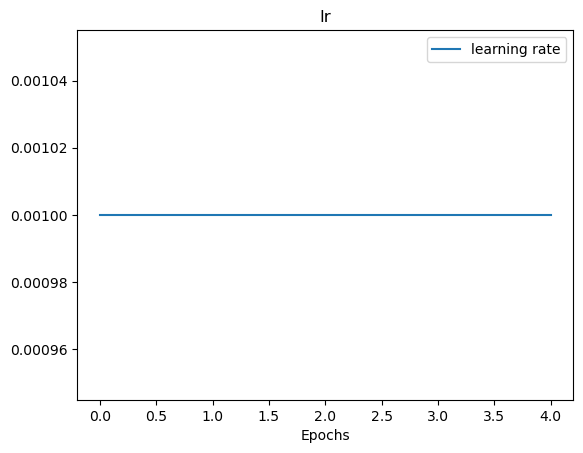

In [25]:

plt.plot(range(len(results["learning_rates"])), results['learning_rates'], label="learning rate")
plt.title("lr")
plt.xlabel("Epochs")
plt.legend()

# Predictions

In [26]:
import torch
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt

from typing import List, Tuple

from PIL import Image

# Set device
device = "cuda" if torch.cuda.is_available() else "cpu"


def pred_and_plot_image(
    model: torch.nn.Module,
    class_names: List[str],
    image_path: str,
    image_size: Tuple[int, int] = (224, 224),
    transform: torchvision.transforms = None,
    device: torch.device = device,
):



    img = Image.open(image_path)

 
    if transform is not None:
        image_transform = transform
    else:
        image_transform = transforms.Compose(
            [
                transforms.Resize(image_size),
                transforms.ToTensor(),
                transforms.Normalize(
                    mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]
                ),
            ]
        )

  


    model.to(device)


    model.eval()
    with torch.inference_mode():
       
        transformed_image = image_transform(img).unsqueeze(dim=0)

  
        target_image_pred = model(transformed_image.to(device))


    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)


    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)


    plt.figure()
    plt.imshow(img)
    plt.title(
        f"Pred: {class_names[target_image_pred_label]} | Prob: {target_image_pred_probs.max():.3f} | {target_image_pred_probs}"
    )
    plt.axis(False)



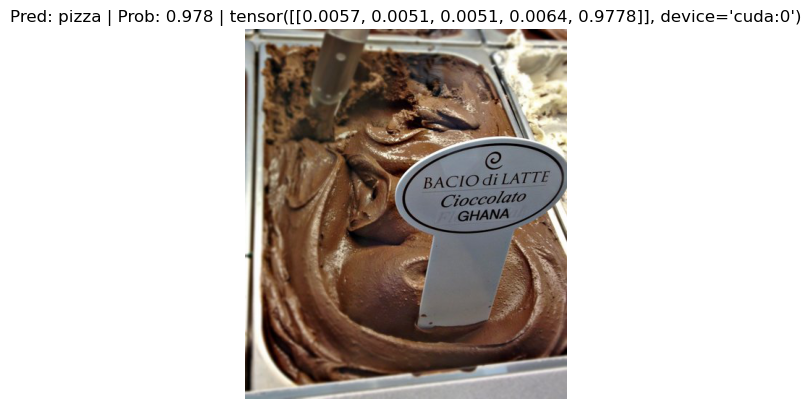

In [27]:
import requests


custom_image_path = "E:/Deep learning/Project/OTHER_DATA/2/archive/food-101/food-101/sub_v2/subset_train_v2/ice_cream/1431592.jpg"



# Predict on custom image
pred_and_plot_image(model=vit,
                    image_path=custom_image_path,
                    class_names=class_names)

In [28]:
ice_cream_path="E:/Deep learning/Project/OTHER_DATA/2/archive/food-101/food-101/sub_v2/subset_train_v2/ice_cream/"

In [29]:
paths=os.listdir(ice_cream_path)
image_size=(224,224)
vit = ViT(num_classes=len(class_names))
vit.load_state_dict(torch.load('E:/Deep learning/Project/code_data/Image-Classification-Using-Vision-transformer-main/weights/overfitmiti_b6/9.pt'), strict=False)

<All keys matched successfully>

In [30]:
# Make sure the model is on the target device
vit.to(device)

# Turn on model evaluation mode and inference mode
vit.eval()

ViT(
  (embedding_dropout): Dropout(p=0.2, inplace=False)
  (patch_embedding): PatchEmbedding(
    (patcher): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    (flatten): Flatten(start_dim=2, end_dim=3)
  )
  (transformer_encoder): Sequential(
    (0): TransformerEncoderBlock(
      (msa_block): MultiheadSelfAttentionBlock(
        (layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (multihead_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
        )
      )
      (mlp_block): MLPBlock(
        (layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU(approximate=none)
          (2): Dropout(p=0.2, inplace=False)
          (3): Linear(in_features=3072, out_features=768, bias=True)
          (4): Dropout(p=0.2, inplace=False)
        )
      )
    )
    

In [ ]:

for i in paths:
    img_path= os.path.join(ice_cream_path,i)
    img = Image.open(img_path)

    image_transform = transforms.Compose(
        [
            transforms.Resize(image_size),
            transforms.ToTensor(),
            transforms.Normalize(
                mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]
            ),
        ]
    )




    with torch.inference_mode():

        transformed_image = image_transform(img).unsqueeze(dim=0)

   
        target_image_pred = vit(transformed_image.to(device))


    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

  
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)
    
    plt.figure()
    plt.imshow(img)
    plt.title(
        f"Pred: {class_names[target_image_pred_label]} | Prob: {target_image_pred_probs.max():.3f} | {target_image_pred_probs}"
    )
    plt.axis(False)